In [1]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import sys
import time
from citipy import citipy
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(".")
from Resources.api_keys import api_key

In [2]:
dataCountryCSV = "./Resources/IP2LOCATION-COUNTRY-INFORMATION.csv"

#Read country names and codes csv file
df_temp = pd.read_csv(dataCountryCSV)

df_Country = df_temp[["country_code","country_name"]]
df_Country.set_index('country_code', inplace=True)
df_Country.head()

,country_name
country_code,
AD,Andorra
AE,United Arab Emirates
AF,Afghanistan
AG,Antigua and Barbuda
AI,Anguilla


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
recs = []
nRec = 1
nSet = 1
print("Beginning Data Retrieval\n-----------------------------")
while (len(recs) < 500):
    # list of Latitude and Longitude 
    # Lat : lRndLL[0] | Lon : lRndLL[1]
    lRndLL = [ np.random.uniform(-90,90), np.random.uniform(-180,180) ]
    lRndLL = [ round(lRndLL[0],2), round(lRndLL[1],2) ]

    # We use the citipy library, to obtain the name of the city, according to the latitude and longitude.
    city = citipy.nearest_city(lRndLL[0], lRndLL[1])
    nameCity = city.city_name
    countryCode = city.country_code.upper()
    
    # If we not found the country's name, then to complete country's name with N/A
    try:
        nameCountry = df_Country.loc[countryCode].item()
    except KeyError:
        nameCountry = "N/A"
    
    # Build query URL
    query_url = url + "units=" + units + "&appid=" + api_key + "&q=" + nameCity
        
    # we to get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if(weather_json["cod"] == 200): #To work only if we found city's coordinates
        print(f"Processing Record {nRec} of Set {nSet} | {nameCity}")
        print(query_url)
        cld = weather_json["clouds"]["all"]
        couCode = weather_json["sys"]["country"]
        dt = weather_json["dt"]
        humi = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        maxTemp = weather_json["main"]["temp_max"]
        windSpd = weather_json["wind"]["speed"]
        rec = {"City":nameCity, "Cloudiness": cld, "Country Code": countryCode, "Country Name":nameCountry, 
               "Date":dt, "Humidity":humi, "Lat":lat , "Lng":lon, "Max Temp": maxTemp, "Wind Speed":windSpd}
        
        '''If we not found record current into dataframe, then we put it into it. 
        This trick will avoid generating duplicate data.
        Otherwise, if we find the current record within the dataframe, 
        we force again to look for another city with other random coordinates.'''
        if (rec not in recs): 
            recs.append(rec)
            nRec = nRec + 1
            if(nRec > 50):
                nRec = 1
                nSet = nSet + 1

        # We sleep to computer
        time.sleep( 0.3 )

# We create a new DataFrame with recs data list.
df_citiesData = pd.DataFrame(recs)
print("----------------------------\nData Retrieval Complete\n----------------------------\n")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=c65c734d579636d9d2d01a683fe03c46&q=acajutla
Processing Record 2 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=c65c734d579636d9d2d01a683fe03c46&q=qaanaaq
Processing Record 3 of Set 1 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=c65c734d579636d9d2d01a683fe03c46&q=srednekolymsk
Processing Record 4 of Set 1 | naze
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=c65c734d579636d9d2d01a683fe03c46&q=naze
Processing Record 5 of Set 1 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=c65c734d579636d9d2d01a683fe03c46&q=ulladulla
Processing Record 6 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=c65c734d579636d9d2d01a683fe03c46&q=ribeira grande
Processing Record 7

In [4]:
df_citiesData.head()

,City,Cloudiness,Country Code,Country Name,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,acajutla,0,SV,El Salvador,1555344643,63,13.59,-89.83,82.99,8.99
1,qaanaaq,36,GL,Greenland,1555344733,100,77.48,-69.36,0.66,1.48
2,srednekolymsk,0,RU,Russian Federation,1555344733,82,67.46,153.71,28.20,6.17
3,naze,44,JP,Japan,1555344734,74,5.43,7.07,88.95,8.19
4,ulladulla,12,AU,Australia,1555344097,100,-35.36,150.48,57.00,8.05


In [10]:
len(df_citiesData)

501

In [7]:
df_citiesData.to_csv("citiesData.csv")

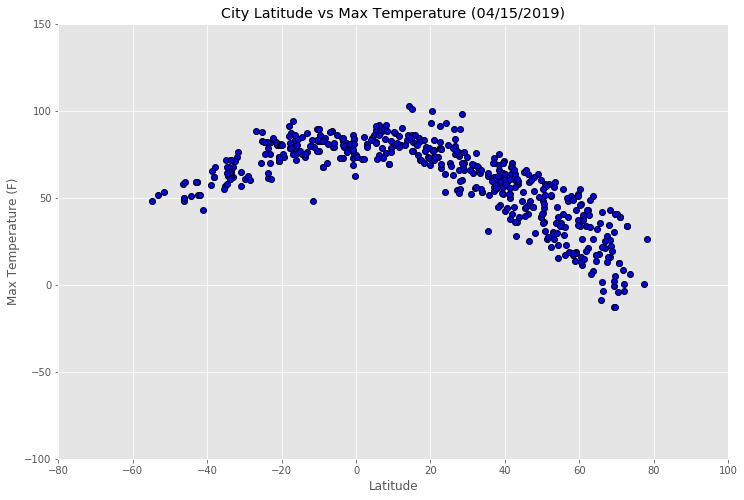

In [42]:
# Graph 1
# Style ggplot
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlim(-80,100)
ax.set_ylim(-100,150)
plt.scatter(df_citiesData[["Lat"]], df_citiesData[["Max Temp"]], color='b', edgecolors="k", linewidths=1)

plt.title("City Latitude vs Max Temperature (04/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("./Images/Graph1.png")
plt.show()

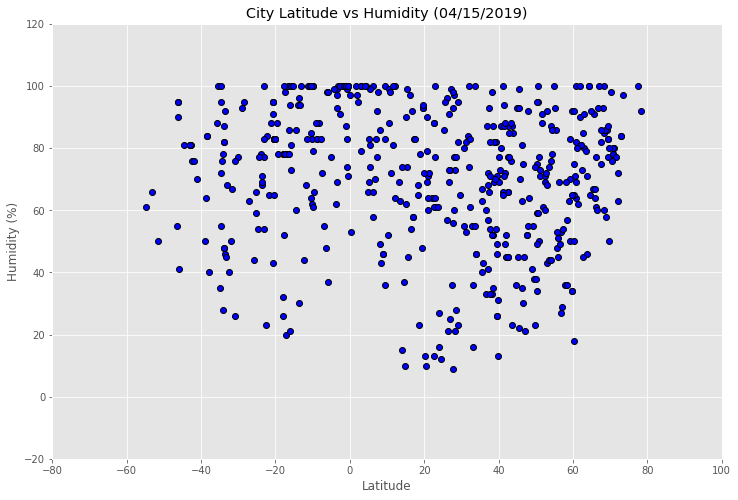

In [43]:
# Graph 2
# Style ggplot
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlim(-80,100)
ax.set_ylim(-20,120)
plt.scatter(df_citiesData[["Lat"]], df_citiesData[["Humidity"]], color='b', edgecolors="k", linewidths=1)

plt.title("City Latitude vs Humidity (04/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/Graph2.png")
plt.show()

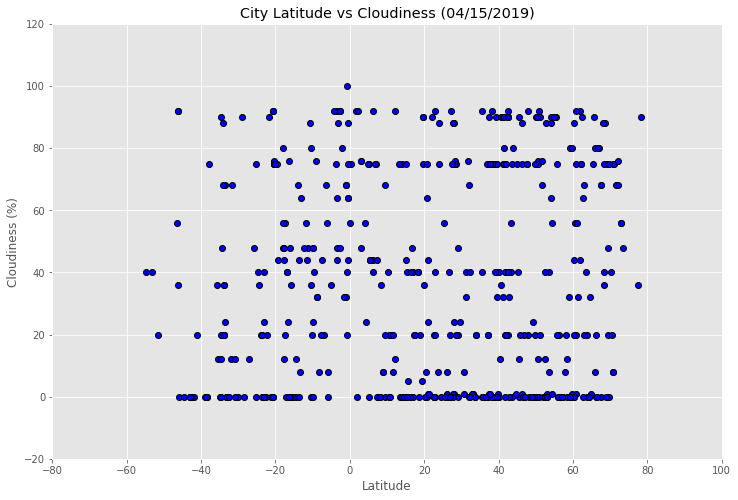

In [44]:
# Graph 3
# Style ggplot
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlim(-80,100)
ax.set_ylim(-20,120)
plt.scatter(df_citiesData[["Lat"]], df_citiesData[["Cloudiness"]], color='b', edgecolors="k", linewidths=1)

plt.title("City Latitude vs Cloudiness (04/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./Images/Graph3.png")
plt.show()

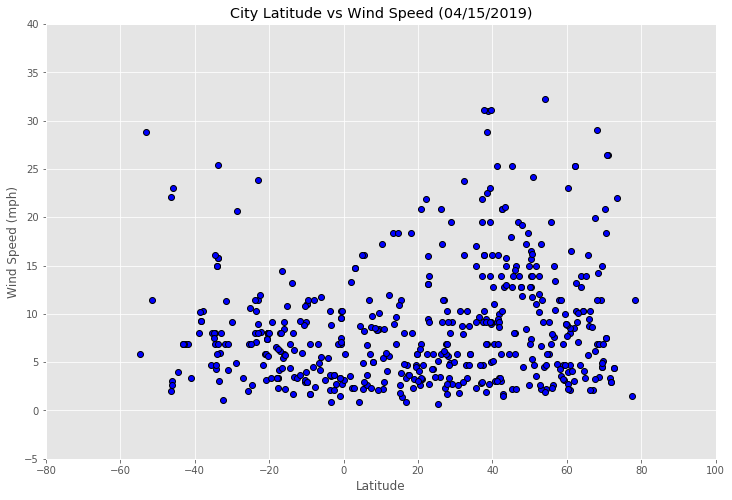

In [45]:
# Graph 4
# Style ggplot
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlim(-80,100)
ax.set_ylim(-5,40)
plt.scatter(df_citiesData[["Lat"]], df_citiesData[["Wind Speed"]], color='b', edgecolors="k", linewidths=1)

plt.title("City Latitude vs Wind Speed (04/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("./Images/Graph4.png")
plt.show()